# Cohort Analysis

-------

## Library

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Data Load
df = pd.read_csv("../data/ecommerce.csv", encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
print(f"Country Length: {df['Country'].nunique()}")
print(f"Country: \n{df['Country'].unique()}")

Country Length: 38
Country: 
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [5]:
# 결측치 확인
null_df = (df.isna().sum() / len(df)) * 100
null_df = null_df.sort_values(ascending=False)
missing_data = null_df.reset_index()
missing_data.columns = ['Column', 'Missing Ratio'] 

print(f"결측치 비율:\n {missing_data}")
print("-" * 30)
print(f"결측치 개수:\n {df.isna().sum()}")

결측치 비율:
         Column  Missing Ratio
0   CustomerID      24.926694
1  Description       0.268311
2    InvoiceNo       0.000000
3    StockCode       0.000000
4     Quantity       0.000000
5  InvoiceDate       0.000000
6    UnitPrice       0.000000
7      Country       0.000000
------------------------------
결측치 개수:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Step 1: 데이터 전처리

> 코호트 분석을 수행하기 전에 데이터를 정제하고, 분석에 적합한 형식으로 변환하는 과정이다.<br>
> 핵심적으로 날짜 변환, 고객의 첫 구매 월(cohort_month) 및 구매 월(purchase_month) 생성 등의 작업을 수행한다.<br>
> 마지막으로, 코호트 인덱스를 계산하여 특정 고객이 첫 구매 후 몇 개월째 다시 구매했는지 확인할 수 있도록 만든다.

In [6]:
# 코호트 분석 전 전처리
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # 날짜 변환
cohort_df = df.dropna(subset=['CustomerID']).copy() # # 결측치 제거
cohort_df['CustomerID'] = cohort_df['CustomerID'].astype(int) # 정수형 변환

cohort_df['cohort_month'] = cohort_df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M') # 첫 구매 날짜 
cohort_df['purchase_month'] = cohort_df['InvoiceDate'].dt.to_period('M') # 현재 주문 연-월
cohort_df['cohort_index'] = (cohort_df['purchase_month'] - cohort_df['cohort_month']).apply(lambda x: x.n)
cohort_df.sort_values(by=['cohort_month'], inplace=True)
cohort_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,purchase_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12,0
177500,552108,22553,PLASTERS IN TIN SKULLS,1,2011-05-06 11:36:00,1.65,17841,United Kingdom,2010-12,2011-05,5
177501,552108,22674,FRENCH TOILET SIGN BLUE METAL,1,2011-05-06 11:36:00,1.25,17841,United Kingdom,2010-12,2011-05,5
177502,552108,20727,LUNCH BAG BLACK SKULL.,5,2011-05-06 11:36:00,1.65,17841,United Kingdom,2010-12,2011-05,5
177503,552108,20725,LUNCH BAG RED RETROSPOT,2,2011-05-06 11:36:00,1.65,17841,United Kingdom,2010-12,2011-05,5
...,...,...,...,...,...,...,...,...,...,...,...
533949,581125,17012C,ORIGAMI LAVENDER INCENSE/CANDL SET,1,2011-12-07 12:41:00,0.85,14087,United Kingdom,2011-12,2011-12,0
533948,581125,21204,DAISIES HONEYCOMB GARLAND,2,2011-12-07 12:41:00,1.65,14087,United Kingdom,2011-12,2011-12,0
533947,581125,22992,REVOLVER WOODEN RULER,1,2011-12-07 12:41:00,1.95,14087,United Kingdom,2011-12,2011-12,0
533945,581125,21123,SET/10 IVORY POLKADOT PARTY CANDLES,1,2011-12-07 12:41:00,1.25,14087,United Kingdom,2011-12,2011-12,0


### Step 2: 코호트별 고객 수 분석

> 고객이 처음 구매한 이후 각 개월(cohort_index)마다 몇 명이 다시 구매했는지를 확인할 수 있도록 피벗 테이블을 생성한다.<br>
> 이렇게 정리된 데이터는 이후 고객 잔존율(Retention Rate) 분석에 활용된다.

In [7]:
# 코호트별 고객 테이블
cohort_customers = cohort_df.pivot_table(index='cohort_month', columns='cohort_index', values='CustomerID', aggfunc='nunique')
cohort_customers

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 3: 코호트별 리텐션 분석

> 코호트별로 시간이 지남에 따라 고객이 얼마나 유지되는지를 비율로 계산한다.<br>
> 히트맵(Heatmap)을 활용하여 시각적으로 고객 유지 패턴을 확인할 수 있다.<br>
> 재구매율을 분석하면 특정 시점에 가입한 고객들이 시간이 지나면서 얼마나 이탈하는지를 한눈에 파악할 수 있다.

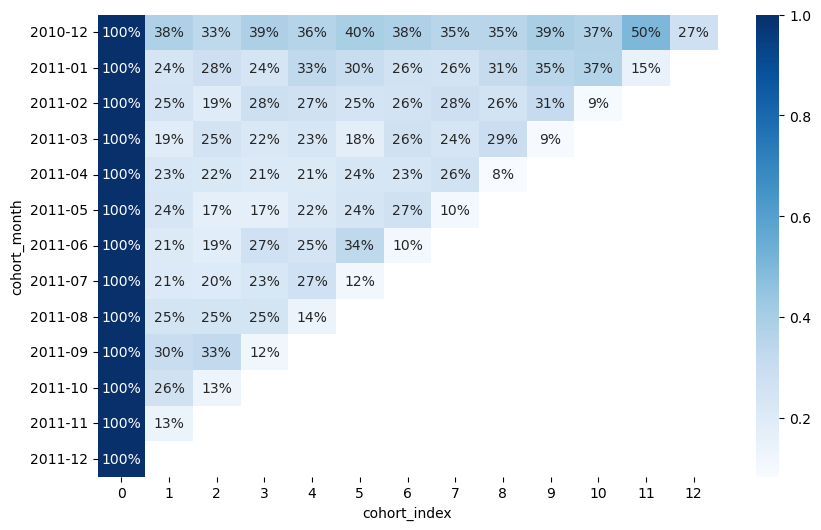

In [8]:
# 재구매율 분석
cohort_retention = cohort_customers.divide(cohort_customers.iloc[:, 0], axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(cohort_retention, annot=True, cmap='Blues', fmt='.0%')
plt.show()